### Question 1


Denote $||\Pi||=\max_{i\in 1,2,\dots,n} (t_i-t_{i-1}) $, then the cross variation of $B(t)$ and $t$ is given by
$$[B(t), t]_T = \lim_{||\Pi||\to 0} \sum_{i=1}^n (B(t_i)-B(t_{i-1}))(t_i-t_{i-1}) $$
Understanding the limit in $L^2$ sense, it is equivalent to show that
$$\lim_{n\to \infty} \mathbb{E} [\sum_{i=1}^n (B(t_i)-B(t_{i-1}))(t_i-t_{i-1}) - 0 ]^2 = 0  $$
In fact,

\begin{align*}
\text{LHS} & \leq [\sum_{i=1}^n \max_{i}|B(t_i)-B(t_{i-1})| \times (t_i-t_{i-1}) ]^2 \\
 &= \max_{i}|B(t_i)-B(t_{i-1})|^2 \times (\sum_{i=1}^n (t_i-t_{i-1}))^2 \\
&= T ^ 2 \times \max_{i}|B(t_i)-B(t_{i-1})|^2 \to T^2 \times 0 = 0\\
\end{align*}

Since brownian motion is continuous on $[0,T]$, we have $\max_{i}|B(t_i)-B(t_{i-1})| \to 0$ as $n\to \infty$. Therefore, $\text{LHS} \to 0$ as $n\to \infty$. This finishes our proof. 

### Question 3

#### (i)

The result given by Example 2.1 is $$\int_0^t B(s)dB(s) = \lim_{||\Pi||\to 0}\sum_{i=1}^n (B(t_i)-B(t_{i-1})) = \frac{1}{2}(B^2(t)-t) $$

Therefore, we have

$$\mathbb{E}[(\int_0^t B(s)dB(s))^2] = \mathbb{E}[\frac{1}{4}(B^2(t)-t)^2] = \frac{1}{4}(\mathbb{E}[B^4(t)]-2t\mathbb{E}[B^2(t)]+t^2) = \frac{1}{4}(3t^2-2t^2+t^2) = \frac{1}{2}t^2 $$

Meanwhile, 

$$\int_0^t \mathbb{E}[B(s)]^2 ds = \int_0^t s ds = \frac{1}{2} t^2$$


Therefore the Ito isometry is verified.

#### (ii)

We first deduct the n-th moment of $X$ for $X\sim \mathcal{N}(0,\sigma^2) $,

\begin{align*}
\mathbb{E}[X^k] = \int_{-\infty}^{+\infty}\cfrac{x^k}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}dx &= \frac{1}{k+1}x^{k+1}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}|^{+\infty}_{-\infty} + \frac{1}{k+1}\int_{-\infty}^{+\infty}\cfrac{x^{k+2}}{\sqrt{2\pi\sigma^2}\sigma^2}e^{-\frac{x^2}{2\sigma^2}}dx \\
&= \frac{1}{k+1}\int_{-\infty}^{+\infty}\cfrac{x^{k+2}}{\sqrt{2\pi\sigma^2}\sigma^2}e^{-\frac{x^2}{2\sigma^2}}dx = \frac{1}{k+1}\mathbb{E}[X^{k+2}]\times \frac{1}{\sigma^2} \\
\end{align*}

$$\Rightarrow \mathbb{E}[X^k] = \sigma^2 (k-1)\mathbb{E}[X^{k-2}] \Rightarrow \mathbb{E}[X^k] = \sigma^k (k-1)!!  $$


Therefore, by Ito isometry, we have

\begin{align*}
Var(\int_0^t B(s)^n dB(s)) &= \mathbb{E}[(\int_0^t B(s)^n dB(s))^2] - (\mathbb{E}[\int_0^t B(s)^n dB(s)])^2 \\
&= \mathbb{E}[(\int_0^t B(s)^n dB(s))^2] \\
&= \int_o^t \mathbb{E}[B(s)^{2n}] ds \\
&= \int_0^t (2n-1)!! \times s^n ds \\ 
&= \frac{(2n-1)!!}{n+1} t^{n+1}  \\

\end{align*}

### Question 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz


def generate_brownian_motion(n_paths,n_steps, dt, x0):
    '''
    generate Brownian motion paths.
    The function take the number of paths, the number of steps, the time interval, and the initial value as inputs, 
    and return a matrix of paths as output.
    '''
    dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)
    dW[:,0] = 0
    W = np.cumsum(dW, axis = 1)
    return x0 + W

def compute_stochastic_integral(f, paths, t):
    '''
    Define a function to compute the stochastic integral of a given function of Brownian motion using the Riemann sum approximation. 
    The function take the function, the Brownian motion paths, and the time interval as inputs, and return a vector of integral values as output.
    '''
    integral = np.ones_like(paths)
    n_paths = paths.shape[0]
    for i in range(n_paths): 
        integral[i] = cumtrapz(f(t,paths[i]), paths[i], initial=0)
    return integral

def good_integrand_1(t,path):
    return 4 * path**3

def good_integrand_2(t, path):
    return np.exp(t/ 2) * np.sin(path)

def bad_integrand(t,path):
    return np.exp(path **2)


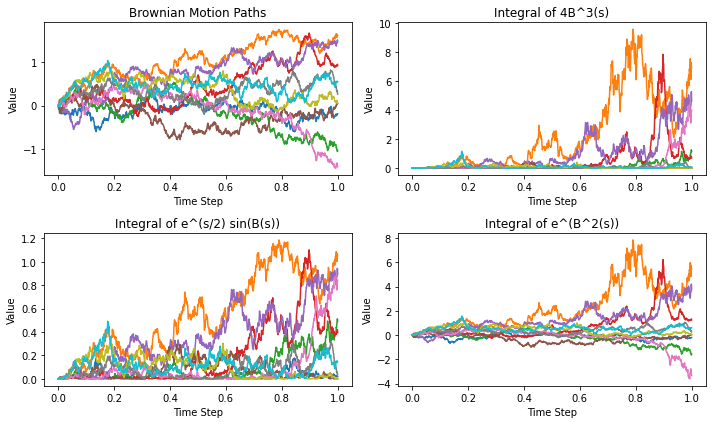

In [2]:
n_paths = 10
n_steps = 1000
dt = 0.001
x0 = 0

paths = generate_brownian_motion(n_paths, n_steps, dt, x0)
t = np.linspace(0, n_steps * dt, n_steps)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(t,paths.T)
plt.title('Brownian Motion Paths')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.subplot(2, 2, 2)

integral_1 = compute_stochastic_integral(good_integrand_1, paths, t)
plt.plot(t,integral_1.T)
plt.title('Integral of 4B^3(s)')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.subplot(2, 2, 3)
integral_2 = compute_stochastic_integral(good_integrand_2, paths, dt)
plt.plot(t,integral_2.T)
plt.title('Integral of e^(s/2) sin(B(s))')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
integral_bad = compute_stochastic_integral(bad_integrand, paths, dt)
plt.plot(t,integral_bad.T)
plt.title('Integral of e^(B^2(s))')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Value')

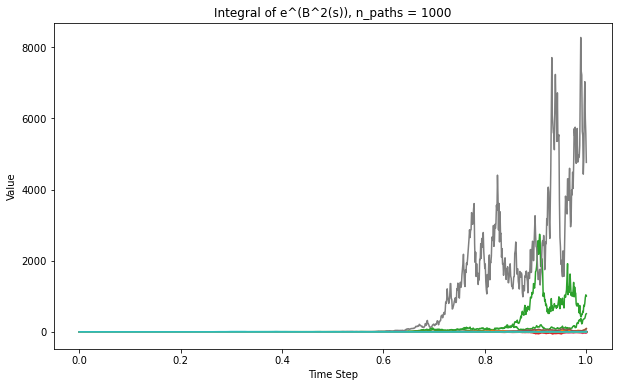

In [6]:
n_paths = 100
n_steps = 1000
dt = 0.001
x0 = 0
paths = generate_brownian_motion(n_paths, n_steps, dt, x0)
t = np.linspace(0, n_steps * dt, n_steps)

integral_bad = compute_stochastic_integral(bad_integrand, paths, dt)

plt.figure(figsize=(10, 6))
plt.plot(t,integral_bad.T)
plt.title('Integral of e^(B^2(s)), n_paths = 1000')
plt.xlabel('Time Step')
plt.ylabel('Value')


If a stochastic process **X** fails to be square integrable, it means that the expectation of the integral of **X** squared over a finite time interval is infinite. FCompared to the good intergral , the integral sample paths of the bad intergrad exhibit some behaviors.
1) the process may not converge or may not be bounded.
2) Expectation of the integral: the integral of the process squared over a finite time interval is infinite
